In [17]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import concatenate
import math
import re
import os 
import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [18]:
pwd


'/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/PROJECT/Data/CX2_16'

In [19]:
path = '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/PROJECT/Data/CX2_16'
files = os.listdir(path)
excel_files = list(filter(lambda x: x[-5:]=='.xlsx' , files))
excel_files

['CX2_16_9_6_11.xlsx',
 'CX2_16_4_18_11.xlsx',
 'CX2_16_2_15_11.xlsx',
 'CX2_16_6_28_12.xlsx',
 'CX2_16_8_29_11.xlsx',
 'CX2_16_4_23_12.xlsx',
 'CX2_16_6_13_11.xlsx',
 'CX2_16_3_2_12.xlsx',
 'CX2_16_1_30_12.xlsx',
 'CX2_16_3_7_11.xlsx',
 'CX2_16_7_12_12.xlsx',
 'CX2_16_4_12_11.xlsx',
 'CX2_16_7_21_11.xlsx',
 'CX2_16_4_17_12.xlsx',
 'CX2_16_10_18_11.xlsx',
 'CX2_16_8_10_12.xlsx',
 'CX2_16_5_23_11.xlsx',
 'CX2_16_7_03_12.xlsx',
 'CX2_16_6_10_11.xlsx',
 'CX2_16_4_1_11.xlsx',
 'CX2_16_9_16_11.xlsx',
 'CX2_16_9_20_11.xlsx',
 'CX2_16_8_19_11.xlsx',
 'CX2_16_4_29_11.xlsx',
 'CX2_16_10_4_11.xlsx',
 'CX2_16_3_27_12.xlsx',
 'CX2_16_6_19_12.xlsx',
 'CX2_16_12_16_11.xlsx',
 'CX2_16_2_25_11.xlsx',
 'CX2_16_3_19_12.xlsx',
 'CX2_16_6_7_11.xlsx',
 'CX2_16_10_14_11.xlsx',
 'CX2_16_4_5_12.xlsx',
 'CX2_16_5_22_12.xlsx',
 'CX2_16_6_01_12.xlsx',
 'CX2_16_8_30_12.xlsx',
 'CX2_16_8_20_12.xlsx',
 'CX2_16_5_13_11.xlsx',
 'CX2_16_3_21_11.xlsx',
 'CX2_16_5_16_12.xlsx',
 'CX2_16_7_23_12.xlsx',
 'CX2_16_6_20_11.xl

In [27]:
df = {}
cycle_data = {}
model_data = {}
i = 0
for excel_file in excel_files:
    df[i] = pd.read_excel(excel_file,sheet_name='Channel_1-006')
    # Grouping rows by the cycle index.
    group = df[i].groupby(['Cycle_Index']).count()
    group['Cumu_count'] = pd.Series(np.random.randn(len(group)), index=group.index)
    group['Cumu_count'] = group['Data_Point'].cumsum()
    # Adding two new pandas columns for charge and discharge in individual cycles.
    df[i]['Charge'] = pd.Series(np.random.randn(len(df[i])), index=df[i].index)
    df[i]['discharge'] = pd.Series(np.random.randn(len(df[i])), index=df[i].index)
    cycle = []
    cycle = group['Cumu_count']
    df[i]['Charge'][0:cycle[1]] = df[i]['Charge_Capacity(Ah)'][0:cycle[1]]
    df[i]['discharge'][0:cycle[1]] = df[i]['Discharge_Capacity(Ah)'][0:cycle[1]]
    # Converting cumulative charge capacity data to individual cycle data.
    for j in range(1,len(cycle)):
        df[i]['Charge'][cycle[j]:cycle[j+1]] = df[i]['Charge_Capacity(Ah)'][cycle[j]:cycle[j+1]]-df[i]['Charge_Capacity(Ah)'][cycle[j]]
        df[i]['discharge'][cycle[j]:cycle[j+1]] = df[i]['Discharge_Capacity(Ah)'][cycle[j]:cycle[j+1]]-df[i]['Discharge_Capacity(Ah)'][cycle[j]]
    # Dropping additional columns 
    cycle_data[i] = df[i].drop(['Data_Point','Internal_Resistance(Ohm)','Step_Index','Step_Time(s)','Charge_Capacity(Ah)','Discharge_Capacity(Ah)','Charge_Energy(Wh)','Discharge_Energy(Wh)','dV/dt(V/s)','Is_FC_Data','AC_Impedance(Ohm)','ACI_Phase_Angle(Deg)'],axis=1)
    cycle_data[i]['Capacity'] = pd.Series(np.random.randn(len(cycle_data[i])), index=cycle_data[i].index)
    # Combining charge and discharge capacities to calculate net charge capacity of the battery.
    cycle_data[i]['Capacity'] = cycle_data[i]['Charge'] - cycle_data[i]['discharge']
    cycle_data[i].set_index('Date_Time',inplace=True)
    model_data[i] = cycle_data[i].drop(['Charge','discharge','Test_Time(s)'],axis=1)
    i = i + 1

/Users/shrilakshmisbonageri/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/shrilakshmisbonageri/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/shrilakshmisbonageri/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/shrilakshmi

In [28]:
df.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [29]:
cycle_data.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [30]:
cycle_data[5].head()

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge,discharge,Capacity
Date_Time,,,,,,,
2012-04-17 14:05:37,30.015020,1,0.000000,3.698377,0.000000,0.0,0.000000
2012-04-17 14:06:07,60.030139,1,0.000000,3.698539,0.000000,0.0,0.000000
2012-04-17 14:06:37,90.045129,1,0.000000,3.698539,0.000000,0.0,0.000000
2012-04-17 14:07:07,120.013246,1,0.000000,3.698539,0.000000,0.0,0.000000
2012-04-17 14:07:38,150.028628,1,0.674908,3.802700,0.005626,0.0,0.005626


In [35]:
model_data[5].tail()

,Cycle_Index,Current(A),Voltage(V),Capacity
Date_Time,,,,
2012-04-20 14:08:33,19,-0.674877,3.758962,0.650505
2012-04-20 14:09:03,19,-0.674697,3.755236,0.644880
2012-04-20 14:09:33,19,-0.674697,3.751672,0.639255
2012-04-20 14:10:03,19,-0.674877,3.747947,0.633630
2012-04-20 14:10:33,19,-0.674877,3.744383,0.628005


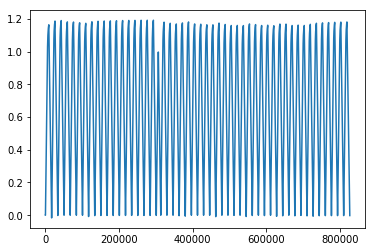

In [50]:
plt.plot(cycle_data[45]['Test_Time(s)'],cycle_data[45]['Capacity'])
